In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [17]:
# function to add age column and merge the vehicle data frame with AQI dataframe

# requires year
# returns merged dataframe of vehicle data and AQI data 

def veh_aqi_merge(year):
    
    # get the vehicle database
    vehicle_df = pd.read_csv("vehicle_data.csv.gz", compression="gzip")
    vehicle_df.head()
    
    # create a dataframe for all vehicles up to given year
    vehicle_year_df = vehicle_df.loc[vehicle_df['model_year'].astype(int) <= year]

    # find the age of cars
    veh_age = year - vehicle_year_df['model_year'].astype(int)

    # create a new dataframe with an vehicle age column
    new_vehicle_df = pd.DataFrame(vehicle_year_df)
    new_vehicle_df['vehicle_age'] = veh_age
    
    # retrieve the AQI index for zipcodes in NY for given year
    aqi_df_all = pd.read_csv("AQIndex.csv", index_col=0)
    
    #group the data by year
    aqi_group = aqi_df_all.groupby('Year')
    
    # retrieve the group for given year
    aqi_df = aqi_group.get_group(year)

    # merge the 2 dataframes on zipcode to get one dataframe 
    # with vehicles and AQI for corressponding zipcodes
    vehicle_aqi_df = pd.merge(aqi_df, new_vehicle_df, on=['zip','zip'], how="left" )

    # returns merged dataframe
    return (vehicle_aqi_df)

In [18]:
# function to find the average AQI for age of vehicle

# requires merged dataframe of vehicle data and AQI data 
# returns a dataframe with vehicle age and AQI

def veh_age_aqi(vehicle_aqi_df):    
    # group data by vehicle age and find mean of AQI
    veh_age_df = vehicle_aqi_df.groupby('vehicle_age').agg({'AQI':'mean'})
    veh_age_df = veh_age_df.reset_index()
    
    # return a dataframe with vehicle age and AQI
    return (veh_age_df)


In [19]:
# function to plot a scatter plot

# requires year, x-values, y-values, Scatter plot title,
# x-axis label, y-axis label, filename to store png

def scatter_plot(x_values, y_values, title, x_label, y_label, file_name):
    # Plot the scatter plot for given year
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values)

    # Plot the linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values)+10, min(y_values)+10),fontsize=15,color="red")

    # Set the title and axis labels   
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Calculate the correlation coefficient
    print(f"The r-squared is: {rvalue**2}")
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()


In [20]:
# function to plot a box plot

# requires box-values, title, y-axis label, filename to store png

def box_plot(y_values, title, y_label, file_name):
    # Calculate quartiles, IQR, and identify potential outliers for given year
    quartiles = y_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    print(f"The lower quartile is: {lowerq}")
    print(f"The upper quartile is: {upperq}")
    print(f"The interquartile range of is: {iqr}")
    print(f"The the median of is: {quartiles[0.5]} ")

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")

    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    ax1.boxplot(y_values)
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)
    
    plt.show()
    

In [21]:
# function to plot a bar plot

# requires dataframe, title, x-axis label, y-axis label, filename to store png

def bar_chart(x_values, y_values, title, x_label, y_label, file_name):

    # Set x axis
    x_num = np.arange(len(x_values))

    # Create the bar graph and set figure size to adjust for space
    plt.figure(figsize=(15,6))
    plt.bar(x_num, y_values, color="b", align="center", width=.5)

    # Create a list indicating where to write x labels
    tick_locations = [value for value in x_num]
    plt.xticks(tick_locations, x_values, rotation="vertical")

    # Set x and y limits
    plt.xlim(-.75, len(x_num)-0.25)
    plt.ylim(0, y_values.max()+20)

    # Set a Title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)
    
    plt.show()


In [22]:
# function to plot a multi box plot

# requires group, title, y-axis label, filename to store png

def mult_box_plot(x_values, y_list , title, y_label, file_name):
 
    fig1, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.set_ylabel(y_label)
    flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='b')
    bp = ax1.boxplot(x_values)

    ax1.set_xticklabels(y_list)

    # save to file
    plt.savefig(file_name, bbox_inches="tight", pad_inches=.3)

    plt.show()


In [23]:
# for given year merge vehicle data and AQI data
year = 2009
veh_complete_df = veh_aqi_merge(year)
veh_complete_df.head()

,zip,AQI,Category Number,Category Name,Pollutant,Year,vin,registration_class,model_year,body_type,fuel_type,vehicle_age
0,12032,90,2,Moderate,OZONE,2009,8T03C193065,PAS,1968.0,CONV,GAS,41.0
1,12032,90,2,Moderate,OZONE,2009,8T01C214689,PAS,1968.0,2DSD,GAS,41.0
2,12032,90,2,Moderate,OZONE,2009,7T03S242307,PAS,1967.0,CONV,GAS,42.0
3,12032,90,2,Moderate,OZONE,2009,6MPCT01Z8P8644612,PAS,1993.0,CONV,GAS,16.0
4,12032,90,2,Moderate,OZONE,2009,57548132568,PAS,1962.0,UTIL,GAS,47.0


In [24]:
# find the average AQI for age of vehicle
veh_age_df = veh_age_aqi(veh_complete_df)
veh_age_df.head()

,vehicle_age,AQI
0,0.0,61.468667
1,1.0,61.445482
2,2.0,60.655640
3,3.0,60.365327
4,4.0,60.121673


The r-squared is: 0.44811961222406105


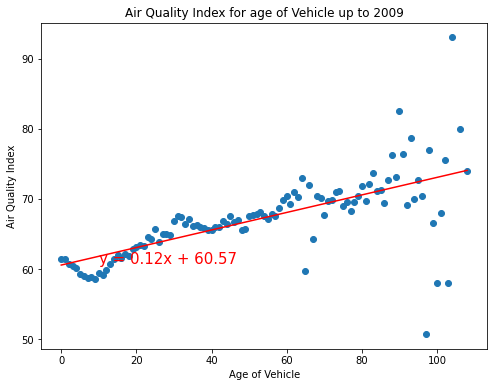

In [25]:
# plot scatter plot of air quality for age of vehicle

# set x-values as age of vehile and y-values are AQI
x_values = veh_age_df['vehicle_age']
y_values = veh_age_df['AQI']

# give a title, x-label and y-label
title = f"Air Quality Index for age of Vehicle up to {year}"
x_label = "Age of Vehicle"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_veh_age_scatter_{year}.png"

scatter_plot(x_values, y_values, title, x_label, y_label, file_name)

The lower quartile is: 63.692888801734554
The upper quartile is: 70.20234315948602
The interquartile range of is: 6.509454357751466
The the median of is: 67.19329388560158 
Values below 53.928707265107356 could be outliers.
Values above 79.96652469611323 could be outliers.


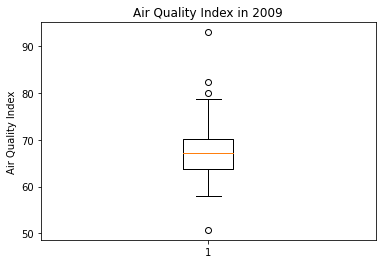

In [26]:
# plot box plot for air quality index for given year

# give AQI for y_values
y_values = veh_age_df['AQI']

# set the title and label for y-axis
title = f'Air Quality Index in {year}'
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_veh_age_box_{year}.png"

box_plot(y_values, title, y_label, file_name)


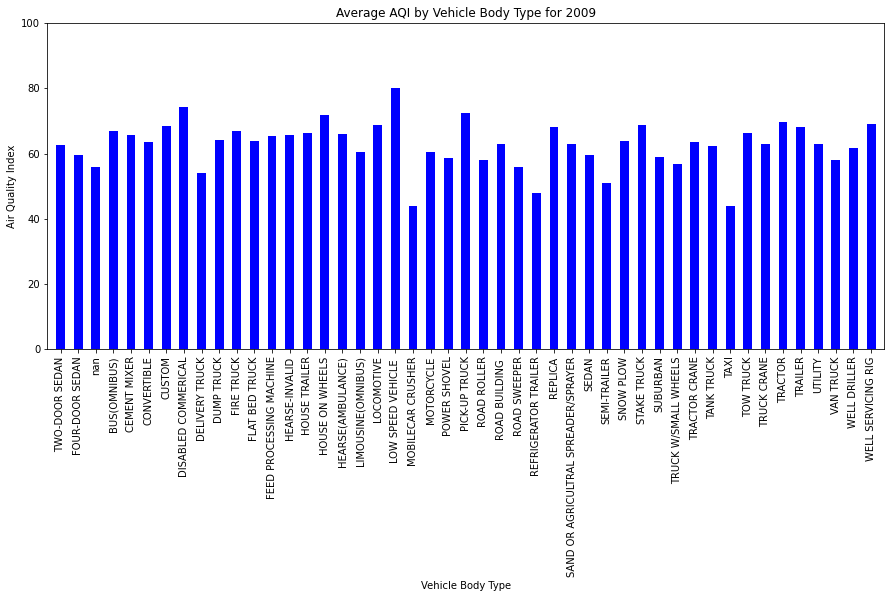

In [27]:
# plot a bar chart of air quality index for different vehicle body types

# group the merged vehicle dataframe by body type and find the average AQI
veh_body_type_df = veh_complete_df.groupby("body_type").agg({"AQI":"mean"})

# find the vehicle body types
veh_body_type_df = veh_body_type_df.reset_index()

# remove any extra trailing spaces
veh_body_type_df['body_type'] = veh_body_type_df['body_type'].str.rstrip()

# get the body type description
ny_veh_body_type_df = pd.read_csv("ny_veh_body_type.csv")
veh_body_type_df['Body Description'] = veh_body_type_df.set_index(veh_body_type_df['body_type']).index.map(ny_veh_body_type_df.set_index(ny_veh_body_type_df['body_type'])['body_description'])
    
# set vehicle body type as x values and AQI as y values
x_values = veh_body_type_df['Body Description']
y_values = veh_age_df['AQI']

# set title, label for x and y axis
title = f"Average AQI by Vehicle Body Type for {year}"
x_label = "Vehicle Body Type"
y_label = "Air Quality Index"

# filename to store the .png file
file_name = f"Images/AQI_veh_body_type_bar_{year}.png"

bar_chart(veh_body_type_df['Body Description'], veh_body_type_df['AQI'], title, x_label, y_label, file_name)

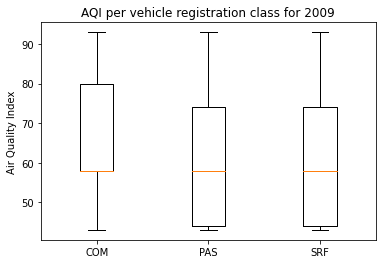

In [28]:
# plot a multi box plot to compare passenger and commercial vehicles vs AQI

# group the data by registration class
veh_class_group = veh_complete_df.groupby("registration_class")

# get the keys of each group
veh_classes = veh_class_group.groups.keys()

veh_class_AQI = []

for veh_class in veh_classes:
    class_group_df = veh_class_group.get_group(veh_class)

    # append to the list the AQI for each vehicle in class
    veh_class_AQI.append(class_group_df['AQI'])
        
# set title and label for y axis
title = f'AQI per vehicle registration class for {year}'
y_label = 'Air Quality Index'

# filename to store the .png file
file_name = f"Images\reg_class_aqi_{year}.png"

mult_box_plot(veh_class_AQI, veh_classes, title, y_label, file_name)